In [6]:
import hvplot.pandas
import holoviews as hv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [7]:
# Read CSV
Fire = pd.read_csv("Resources/fire_archive_M-C61_423958.csv")
Fire.head(5)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,19.4050,-155.2786,362.3,1.7,1.3,2014-01-01,1147,Aqua,MODIS,100,6.03,287.3,210.6,N,1
1,19.4384,-155.0778,352.9,1.7,1.3,2014-01-01,1147,Aqua,MODIS,100,6.03,294.7,147.6,N,1
2,19.4366,-155.0624,340.5,1.7,1.3,2014-01-01,1147,Aqua,MODIS,100,6.03,294.3,95.5,N,1
3,19.4030,-155.2622,314.0,1.7,1.3,2014-01-01,1147,Aqua,MODIS,84,6.03,285.3,32.4,N,1
4,19.4270,-155.0791,314.7,1.7,1.3,2014-01-01,1147,Aqua,MODIS,86,6.03,288.3,30.0,N,1


In [8]:
# Convert 'acq_date' column to datetime objects
Fire['acq_date'] = pd.to_datetime(Fire['acq_date'])

# Filter dates after 2020
filter_2020 = Fire[Fire['acq_date'].dt.year == 2015]
filter_2020

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
98871,19.4104,-155.2771,306.4,1.1,1.1,2015-01-01,830,Terra,MODIS,68,6.03,284.0,12.1,N,1
98872,19.4425,-155.0047,324.1,1.1,1.0,2015-01-01,830,Terra,MODIS,100,6.03,286.0,29.0,N,1
98873,19.4087,-155.2876,309.8,1.1,1.1,2015-01-01,830,Terra,MODIS,78,6.03,284.0,14.8,N,1
98874,19.4601,-154.9925,313.0,1.1,1.0,2015-01-01,830,Terra,MODIS,86,6.03,288.0,16.7,N,1
98875,41.6333,-87.1361,301.0,1.9,1.3,2015-01-01,1717,Terra,MODIS,33,6.03,270.7,22.7,D,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245850,19.4195,-155.1007,349.6,1.0,1.0,2015-12-31,2106,Terra,MODIS,95,6.03,301.1,60.5,D,1
245851,19.4181,-155.0910,369.5,1.0,1.0,2015-12-31,2106,Terra,MODIS,100,6.03,311.6,112.6,D,1
245852,19.4100,-155.2794,367.8,1.0,1.0,2015-12-31,2106,Terra,MODIS,100,6.03,310.7,103.9,D,1
245853,19.4018,-155.2873,382.0,1.0,1.0,2015-12-31,2106,Terra,MODIS,100,6.03,300.8,158.7,D,1


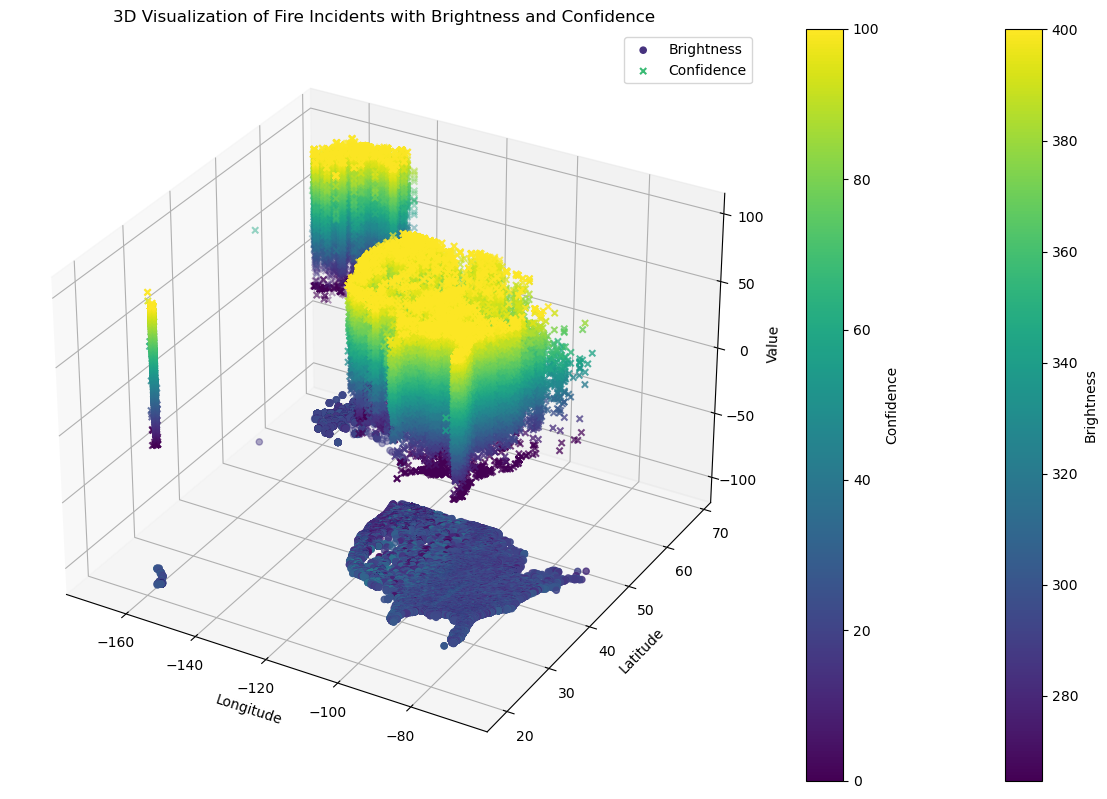

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have access to the Fire data frame with columns latitude, longitude, brightness, and confidence
latitudes_unique = filter_2020["latitude"]
longitudes_unique = filter_2020["longitude"]
latitudes = filter_2020["latitude"]
longitudes = filter_2020["longitude"]
brightness = filter_2020["bright_t31"]
confidence = filter_2020["confidence"]

# Normalize confidence values to the range of brightness
normalized_confidence = (confidence ) 

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
z1 = -105

# Plot points representing brightness
ax.scatter(longitudes_unique, latitudes_unique, z1, c=brightness, cmap='viridis', marker='o', label='Brightness')

# Plot points representing normalized confidence using different marker
ax.scatter(longitudes, latitudes, normalized_confidence, c=normalized_confidence, cmap='viridis', marker='x', label='Confidence')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Value')
ax.set_title('3D Visualization of Fire Incidents with Brightness and Confidence')

# Add colorbars
cbar1 = fig.colorbar(ax.collections[0], ax=ax, orientation='vertical', label='Brightness')
cbar2 = fig.colorbar(ax.collections[1], ax=ax, orientation='vertical', label='Confidence')

# Add legend
ax.legend()
plt.savefig('confidence2014.png', dpi=600)
plt.tight_layout()
plt.show()

In [11]:
unique_counts = Fire["scan"].count()
unique_counts

1201829

In [12]:
unique_lat = Fire["latitude"].nunique()
unique_lat

272579

In [13]:
unique=Fire.groupby(["longitude"])[["confidence", "bright_t31","frp", "latitude", "longitude"]].mean()
unique

,confidence,bright_t31,frp,latitude,longitude
longitude,,,,,
-176.6098,0.0,289.5,15.1,51.9764,-176.6098
-176.1446,93.0,281.5,29.9,52.0732,-176.1446
-176.1438,86.0,280.0,32.8,52.0773,-176.1438
-176.1420,81.0,288.9,27.9,52.0768,-176.1420
-176.1419,51.0,271.5,23.3,52.0816,-176.1419
...,...,...,...,...,...
-67.4904,50.0,290.3,14.1,44.6551,-67.4904
-67.4678,41.0,291.1,15.0,44.6600,-67.4678
-67.3875,61.0,289.2,6.1,45.0282,-67.3875


In [14]:
sort_by_lng= Fire["latitude"].count()
sort_by_lng

1201829

In [15]:
sort_by_date= Fire.groupby(["acq_date"])[["confidence", "bright_t31","frp", "latitude", "longitude"]].mean()
sort_by_date.head(20)

,confidence,bright_t31,frp,latitude,longitude
acq_date,,,,,
2014-01-01,63.878788,287.209091,27.193939,31.183809,-111.717812
2014-01-02,66.205882,288.902941,44.017647,28.814403,-117.617094
2014-01-03,66.482456,285.289474,34.950000,33.276468,-109.831242
2014-01-04,60.075472,287.196226,37.386792,33.212540,-100.908079
2014-01-05,75.821918,286.430137,62.758904,35.599826,-122.203895
2014-01-06,74.457143,283.568571,61.537143,26.800106,-127.176060
2014-01-07,66.805195,282.379221,38.784416,29.086392,-112.595431
2014-01-08,67.568182,283.150000,42.870455,30.400343,-112.618141
2014-01-09,64.383562,287.990411,46.382192,27.279210,-118.477018


In [16]:
sort_by_date.count()

confidence    3318
bright_t31    3318
frp           3318
latitude      3318
longitude     3318
dtype: int64

In [17]:
sort_by_date.loc[sort_by_date["confidence"]< 80].count()

confidence    3293
bright_t31    3293
frp           3293
latitude      3293
longitude     3293
dtype: int64

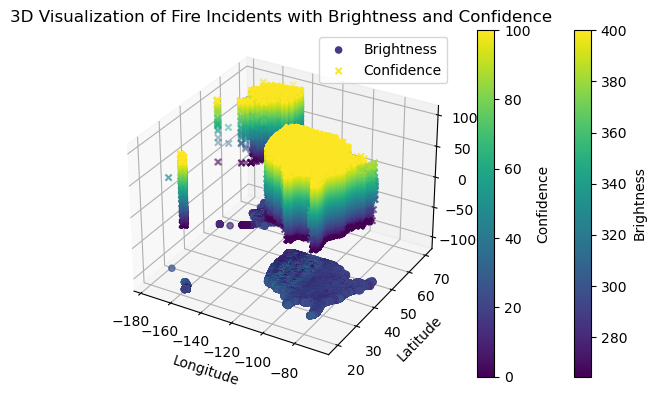

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have access to the Fire data frame with columns latitude, longitude, brightness, and confidence
latitudes_unique = Fire["latitude"]
longitudes_unique = Fire["longitude"]
latitudes = Fire["latitude"]
longitudes = Fire["longitude"]
brightness = Fire["bright_t31"]
confidence = Fire["confidence"]

# Normalize confidence values to the range of brightness
normalized_confidence = (confidence ) 

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
z1 = -105

# Plot points representing brightness
ax.scatter(longitudes_unique, latitudes_unique, z1, c=brightness, cmap='viridis', marker='o', label='Brightness')

# Plot points representing normalized confidence using different marker
ax.scatter(longitudes, latitudes, normalized_confidence, c=normalized_confidence, cmap='viridis', marker='x', label='Confidence')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Value')
ax.set_title('3D Visualization of Fire Incidents with Brightness and Confidence')

# Add colorbars
cbar1 = fig.colorbar(ax.collections[0], ax=ax, orientation='vertical', label='Brightness')
cbar2 = fig.colorbar(ax.collections[1], ax=ax, orientation='vertical', label='Confidence')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

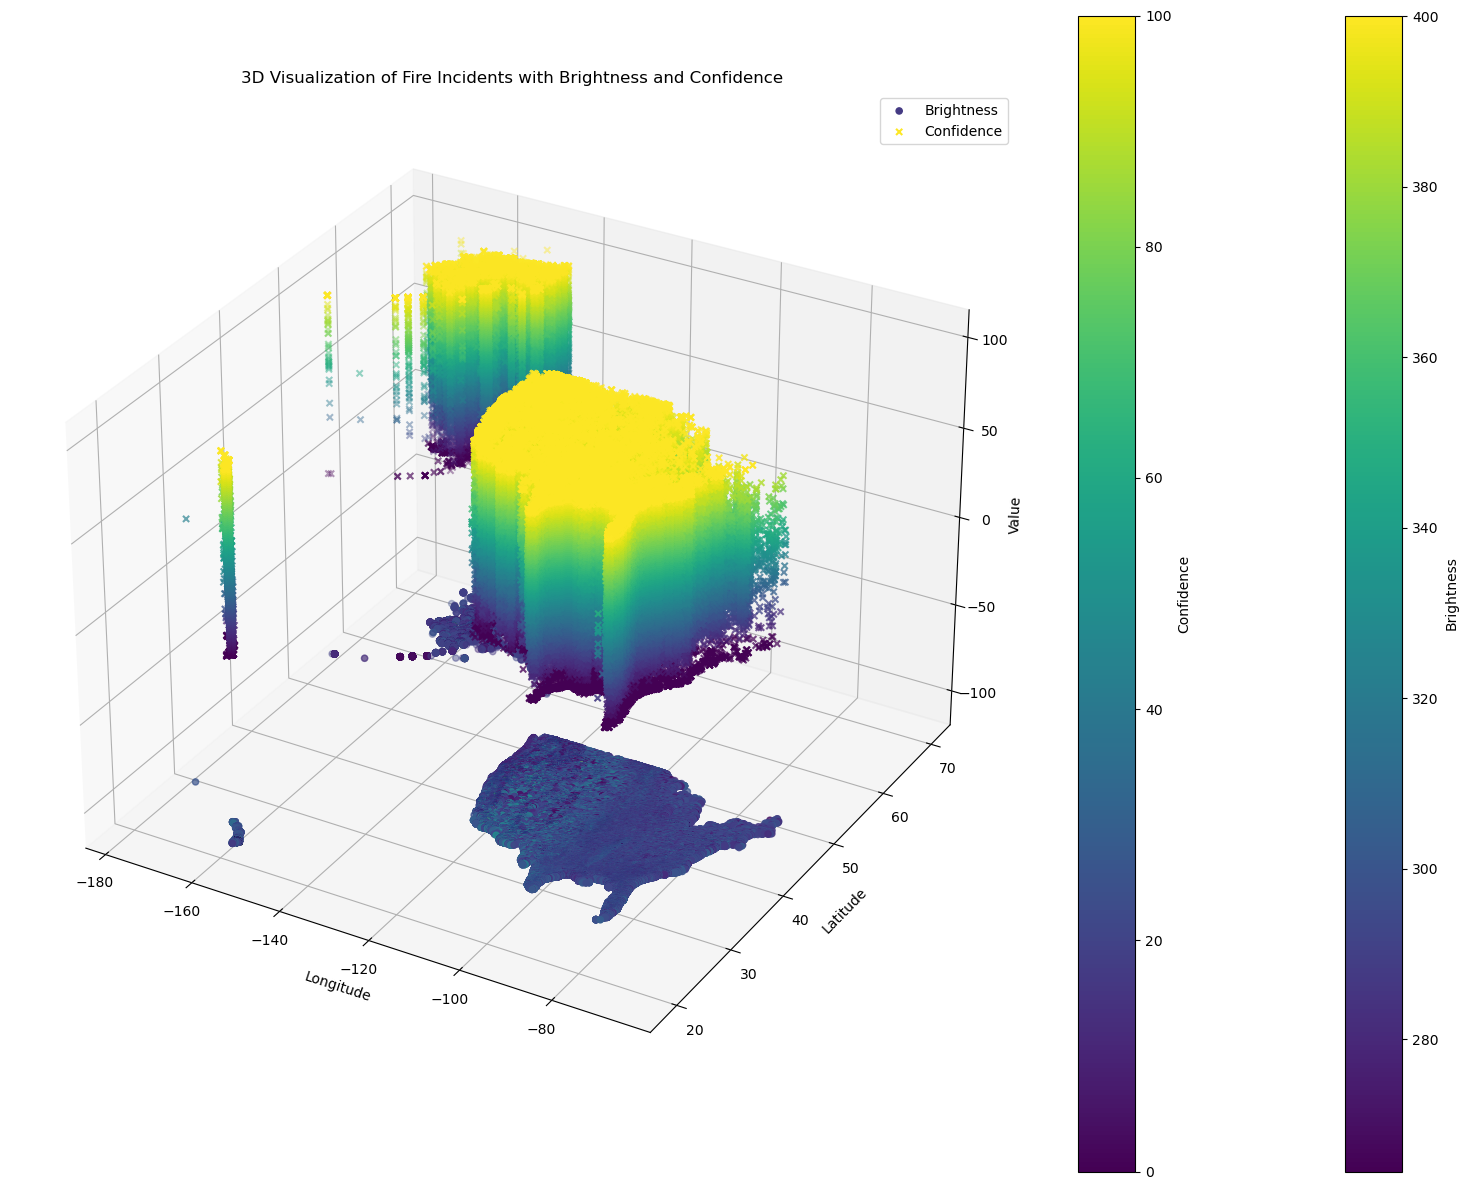

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have access to the Fire data frame with columns latitude, longitude, brightness, and confidence
latitudes_unique = Fire["latitude"]
longitudes_unique = Fire["longitude"]
latitudes = Fire["latitude"]
longitudes = Fire["longitude"]
brightness = Fire["bright_t31"]
confidence = Fire["confidence"]

# Create a 3D plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
z1= -105
# Plot points representing brightness
ax.scatter(longitudes_unique, latitudes_unique, z1, c=brightness, cmap='viridis',marker='o', label='Brightness')


# Plot points representing confidence using different marker
ax.scatter(longitudes, latitudes, confidence, c=confidence, cmap='viridis', marker='x', label='Confidence')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Value')
ax.set_title('3D Visualization of Fire Incidents with Brightness and Confidence')

# Add colorbars
cbar1 = fig.colorbar(ax.collections[0], ax=ax, orientation='vertical', label='Brightness')
cbar2 = fig.colorbar(ax.collections[1], ax=ax, orientation='vertical', label='Confidence')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

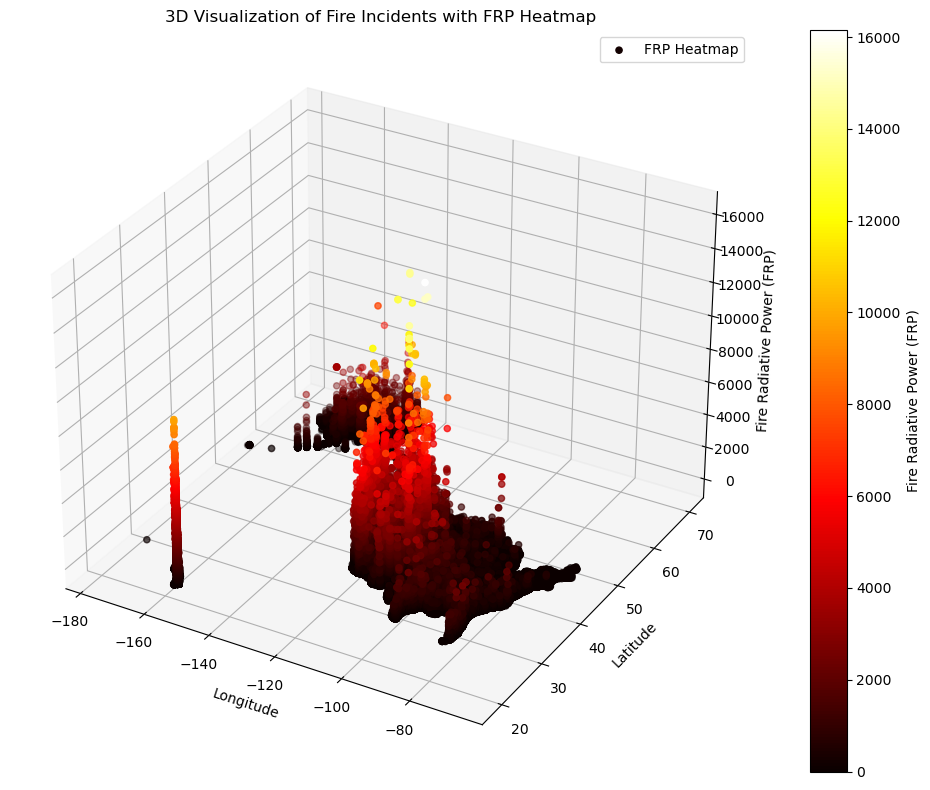

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have access to the Fire data frame with columns latitude, longitude, brightness, and confidence
latitudes = Fire["latitude"]
longitudes = Fire["longitude"]
frp = Fire["frp"]

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points representing fire radiative power (frp) as a heatmap
ax.scatter(longitudes, latitudes, frp, c=frp, cmap='hot', label='FRP Heatmap')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Fire Radiative Power (FRP)')
ax.set_title('3D Visualization of Fire Incidents with FRP Heatmap')

# Add colorbar
cbar = fig.colorbar(ax.collections[0], ax=ax, orientation='vertical', label='Fire Radiative Power (FRP)')

# Add legend
ax.legend()
plt.savefig('fire_incidents_3d_heatmap.png', dpi=600)
plt.tight_layout()
plt.show()
